In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
dengue=pd.read_csv('dengue.csv')
dengue=dengue.dropna()
dengue.head()

,Unnamed: 0,humid,humid90,temp,temp90,h10pix,h10pix90,trees,trees90,NoYes,Xmin,Xmax,Ymin,Ymax
0,1,0.671389,4.416667,2.037500,8.470835,17.356529,17.808611,0.0,1.5,0,70.5,74.5,38.0,35.5
1,2,7.648334,8.167500,12.325000,14.925000,10.983610,11.691670,0.0,1.0,0,62.5,64.5,35.5,34.5
2,3,6.979056,9.563058,6.925000,14.591660,17.508329,17.625280,0.0,1.2,0,68.5,69.5,36.0,35.0
3,4,1.110416,1.825361,4.641665,6.046669,17.417635,17.516939,0.0,0.6,0,67.0,68.0,35.0,34.0
4,5,9.027055,9.742751,18.175000,19.710000,13.843060,13.843060,0.0,0.0,0,61.0,64.5,33.5,32.0


In [3]:
features=dengue[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']]
features.head()

,humid,temp,h10pix,trees,Xmin,Ymin
0,0.671389,2.037500,17.356529,0.0,70.5,38.0
1,7.648334,12.325000,10.983610,0.0,62.5,35.5
2,6.979056,6.925000,17.508329,0.0,68.5,36.0
3,1.110416,4.641665,17.417635,0.0,67.0,35.0
4,9.027055,18.175000,13.843060,0.0,61.0,33.5


In [4]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(features).score(features) for i in range(len(km))]
inertia=[km[i].inertia_ for i in range(len(km))]

Text(0, 0.5, 'Within-cluster variation')

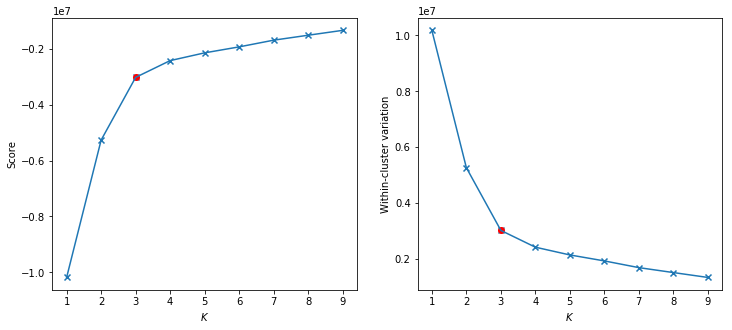

In [5]:
fig1, ax=plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(Ks,score,marker='x')
ax[0].plot(Ks,score)
ax[0].scatter(Ks[2],score[2],color='r',marker='o')
ax[0].set_xlabel('$K$')
ax[0].set_ylabel('Score')

ax[1].scatter(Ks,inertia,marker='x')
ax[1].plot(Ks,inertia)
ax[1].scatter(Ks[2],inertia[2],color='r',marker='o')
ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Within-cluster variation')

Cómo vemos de las gráficas superiores, el _Elbow Method_ nos indica que 3 es el número óptimo de clusters para este problem

## b)

In [6]:
data=pd.read_csv('BreadBasket_DMS.csv')
data=data.dropna()
data_2=data
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [13]:
import datetime
import time
x = time.strptime('00:01:00,000'.split(',')[0],'%H:%M:%S')
datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

60.0

In [8]:
LBEs = range(1, 4)

lbe=[LabelEncoder() for i in LBEs]
lbe[2].fit(data.iloc[:,3])
data['Item']=lbe[2].transform(data.iloc[:,3])
lbe[1].fit(data.iloc[:,1])
data['Time']=lbe[1].transform(data.iloc[:,1])
lbe[0].fit(data.iloc[:,0])
data['Date']=lbe[0].transform(data.iloc[:,0])

In [9]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(data)
data=ohe.transform(data)

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [10]:
rows,cols=np.shape(data)

In [11]:
np.shape(data)

(21293, 18025)

In [12]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(data[:rows//10]).score(data[:rows//10]) for i in range(len(km))]
inertia=[km[i].inertia_ for i in range(len(km))]

In [14]:
data[:10]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Text(0, 0.5, 'Within-cluster variation')

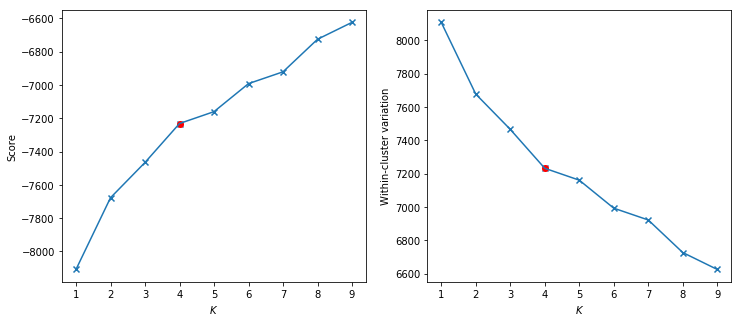

In [13]:
fig1, ax=plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(Ks,score,marker='x')
ax[0].plot(Ks,score)
ax[0].scatter(Ks[3],score[3],color='r',marker='o')
ax[0].set_xlabel('$K$')
ax[0].set_ylabel('Score')

ax[1].scatter(Ks,inertia,marker='x')
ax[1].plot(Ks,inertia)
ax[1].scatter(Ks[3],inertia[3],color='r',marker='o')
ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Within-cluster variation')

para este caso, parece que el número óptimo de clusters es 4.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca=PCA(n_components=4)
pca.fit(data)

In [ ]:
var=pca.explained_variance_
comp=pca.components_
projection=pca.transform(data)
llaves=data.keys()
sc=1.9

In [1]:
kmeans = KMeans(n_clusters=4)
km[3].fit(projection)
y_kmeans = kmeans.predict(projection)
X=projection
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis',alpha=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

NameError: name 'KMeans' is not defined

In [32]:
index_clus=kmeans.predict(data)

In [33]:
data_2['Date']=lbe[0].inverse_transform(data.iloc[:,0])
data_2['Time']=lbe[1].inverse_transform(data.iloc[:,1])
data_2['Item']=lbe[2].inverse_transform(data.iloc[:,3])

In [35]:
data_2.iloc[index_clus==1].head()

,Date,Time,Transaction,Item
903,2016-11-04,07:32:33,437,Medialuna
2716,2016-11-14,07:39:27,1275,Coffee
2866,2016-11-15,07:42:27,1342,Coffee
2867,2016-11-15,07:42:27,1342,Medialuna
2992,2016-11-16,07:49:01,1408,Coffee


In [37]:
data_2.iloc[index_clus==3].head()

,Date,Time,Transaction,Item


In [40]:
VPD=data[['Date','Transaction','Item']].values #este array buscará guardar las ventas por día
VPD.shape

(21293, 3)

In [42]:
def calcular_VPD(arr,a,b,c):
    new_ar=arr
    filas=arr.shape()[0]
    cola,colb=0,0
    for i in range (filas):
        cola=new_ar[i,a]
        colb=new_ar[i,b]
        for j in range(i+1,filas):
            if new_ar[j,a]==cola and new_ar[j,b]==colb:
                new_ar[i,c]+=new_ar[j,c]
                new_arr=np.delete(new_ar,j,0)
    return new_ar

In [41]:
VPD[:10]

array([[ 0,  1, 11],
       [ 0,  2, 75],
       [ 0,  2, 75],
       [ 0,  3, 48],
       [ 0,  3, 49],
       [ 0,  3, 26],
       [ 0,  4, 60],
       [ 0,  5, 23],
       [ 0,  5, 66],
       [ 0,  5, 11]])

In [ ]:
VPD=calcular_VPD(arr,)